
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '400101691'
first_name = 'Kimia'
last_name = 'Fakheri'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [13]:
# Load the data from CSV
file_path = 'spotify.csv'
data = pd.read_csv(file_path)

# Select relevant columns
relevant_columns = ['track_name', 'track_artist', 'track_popularity',
                    'danceability', 'energy', 'loudness', 'speechiness',
                    'instrumentalness', 'liveness', 'tempo', 'duration_ms']

filtered_data = data[relevant_columns]

# Print the first few rows to verify
print(filtered_data.head())

                                          track_name      track_artist  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                    Memories - Dillon Francis Remix          Maroon 5   
2                    All the Time - Don Diablo Remix      Zara Larsson   
3                  Call You Mine - Keanu Silva Remix  The Chainsmokers   
4            Someone You Loved - Future Humans Remix     Lewis Capaldi   

   track_popularity  danceability  energy  loudness  speechiness  \
0                66         0.748   0.916    -2.634       0.0583   
1                67         0.726   0.815    -4.969       0.0373   
2                70         0.675   0.931    -3.432       0.0742   
3                60         0.718   0.930    -3.778       0.1020   
4                69         0.650   0.833    -4.672       0.0359   

   instrumentalness  liveness    tempo  duration_ms  
0          0.000000    0.0653  122.036       194754  
1          0.004210    0.3570   99.972

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [15]:
# Function to perform standard scaling
def standard_scaler(data):
    mean = data.mean()
    std_dev = data.std()
    scaled_data = (data - mean) / std_dev
    return scaled_data, mean, std_dev

# Select numerical columns for scaling
numerical_columns = ['track_popularity', 'danceability', 'energy',
                     'key','loudness','mode','speechiness', 'acousticness',
                     'instrumentalness', 'liveness', 'valence',
                     'tempo', 'duration_ms']

# Apply standard scaling to selected columns
scaled_data = data.copy()
for col in numerical_columns:
    scaled_data[col], mean, std_dev = standard_scaler(data[col])

# Print the first few rows of scaled data to verify
print(scaled_data.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran          0.941517  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5          0.981542  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson          1.101619  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers          0.701364  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi          1.061593  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

Standard scaling (also known as z-score normalization) transforms data such that it has a mean of 0 and a standard deviation of 1. This transformation is crucial in clustering for several reasons:

1.   Normalization of Features: Clustering algorithms such as K-means are sensitive to the scale of features. Features with larger scales (e.g., higher numerical ranges) can dominate the clustering process, leading to biased cluster formation.
2.   Equal Weighting of Features: Standard scaling ensures that all features contribute equally to the distance computations in clustering algorithms. Without scaling, features with larger scales may disproportionately influence the clustering results.
3.   Improved Convergence: Scaling helps clustering algorithms converge faster because the scaled data reduces the variance across features, making the optimization process more stable.



# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

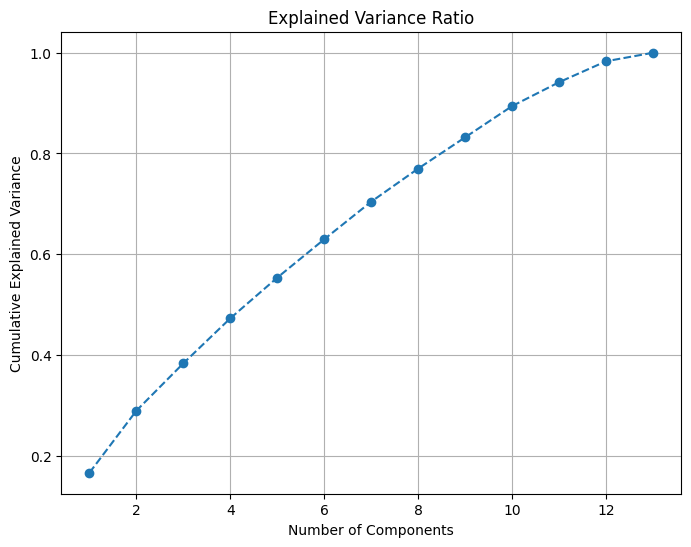

Number of principal components to retain (95% variance threshold): 12


In [20]:
# Load the data from CSV
file_path = 'spotify.csv'
data = pd.read_csv(file_path)

# Select numerical columns for PCA
numerical_columns = ['track_popularity', 'danceability', 'energy', 'key', 'loudness',
                     'mode', 'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'duration_ms']

# Separate out the numerical data for PCA
X = data[numerical_columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Determine number of components to retain based on 95% variance threshold
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of principal components to retain (95% variance threshold): {n_components}")


# Clustering

Implement K-means for clustering from scratch.

In [22]:
class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize centroids randomly
        random_sample_indices = np.random.choice(self.n_samples, self.n_clusters, replace=False)
        self.centroids = self.X[random_sample_indices]

        # Initialize cluster labels and distances
        self.labels = np.zeros(self.n_samples)
        self.distances = np.zeros((self.n_samples, self.n_clusters))

        for _ in range(self.max_iter):
            # Assign samples to nearest centroid
            self.labels = self._assign_clusters()

            # Update centroids
            centroids_old = self.centroids.copy()
            self.centroids = self._update_centroids()

            # Check for convergence
            if np.allclose(centroids_old, self.centroids):
                break

    def _assign_clusters(self):
        # Compute distances from each sample to each centroid
        for i in range(self.n_clusters):
            self.distances[:, i] = np.linalg.norm(self.X - self.centroids[i], axis=1)

        # Assign samples to closest centroid
        return np.argmin(self.distances, axis=1)

    def _update_centroids(self):
        # Update centroids by taking the mean of all samples assigned to each centroid
        centroids = np.zeros((self.n_clusters, self.n_features))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(self.X[self.labels == i], axis=0)
        return centroids

    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        return np.argmin(distances, axis=1)

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

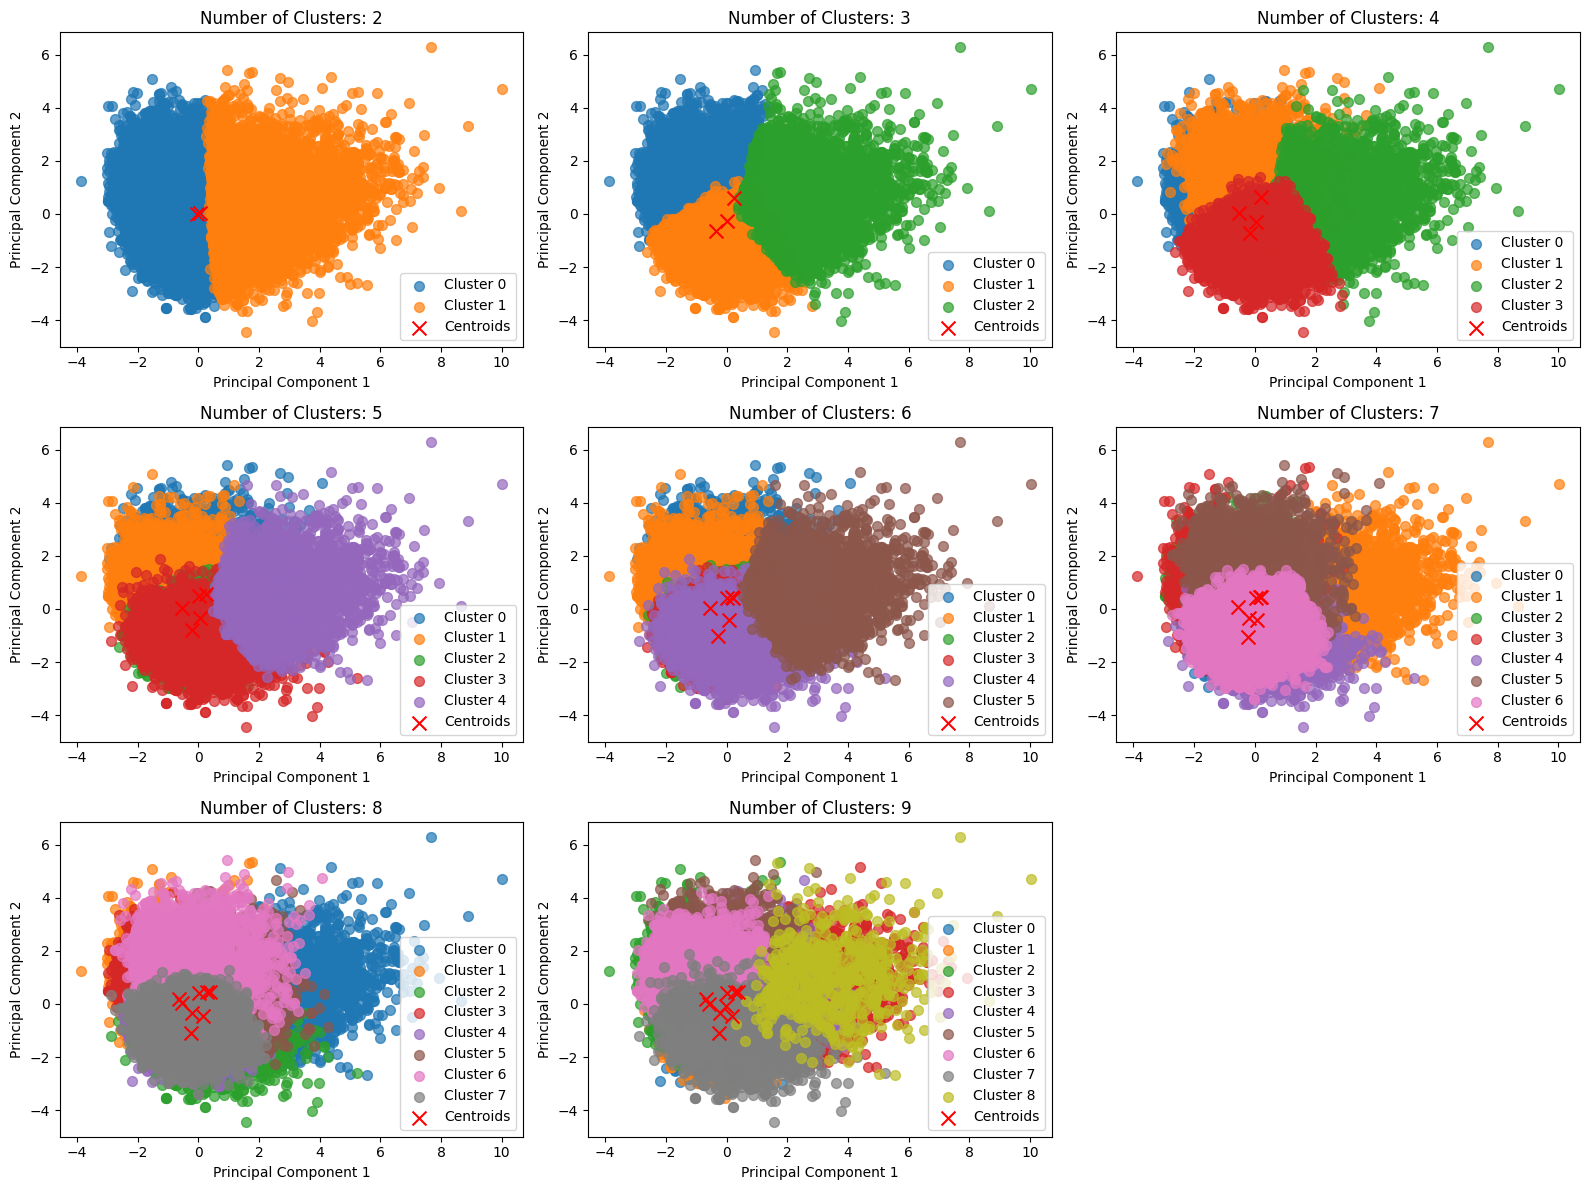

In [26]:
# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Initialize K-means for different numbers of clusters (2 to 9)
num_clusters_range = range(2, 10)
kmeans_models = []
cluster_assignments = []

# Set a random seed for reproducibility
np.random.seed(42)

for n_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    kmeans_models.append(kmeans)
    cluster_assignments.append(kmeans.predict(X_scaled))  # Use predict method to get cluster assignments

# Plotting clusters for each number of clusters
plt.figure(figsize=(16, 12))

for i, n_clusters in enumerate(num_clusters_range):
    plt.subplot(3, 3, i + 1)
    plt.title(f'Number of Clusters: {n_clusters}')

    # Plot data points colored by cluster assignment
    for cluster in range(n_clusters):
        plt.scatter(X_pca[cluster_assignments[i] == cluster, 0],
                    X_pca[cluster_assignments[i] == cluster, 1],
                    label=f'Cluster {cluster}', alpha=0.7, s=50)

    # Plot centroids
    centroids = kmeans_models[i].cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r', s=100, label='Centroids')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()

plt.tight_layout()
plt.show()


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 11%|█         | 1/9 [00:10<01:26, 10.79s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 22%|██▏       | 2/9 [00:21<01:14, 10.58s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 33%|███▎      | 3/9 [00:31<01:01, 10.28s/it]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

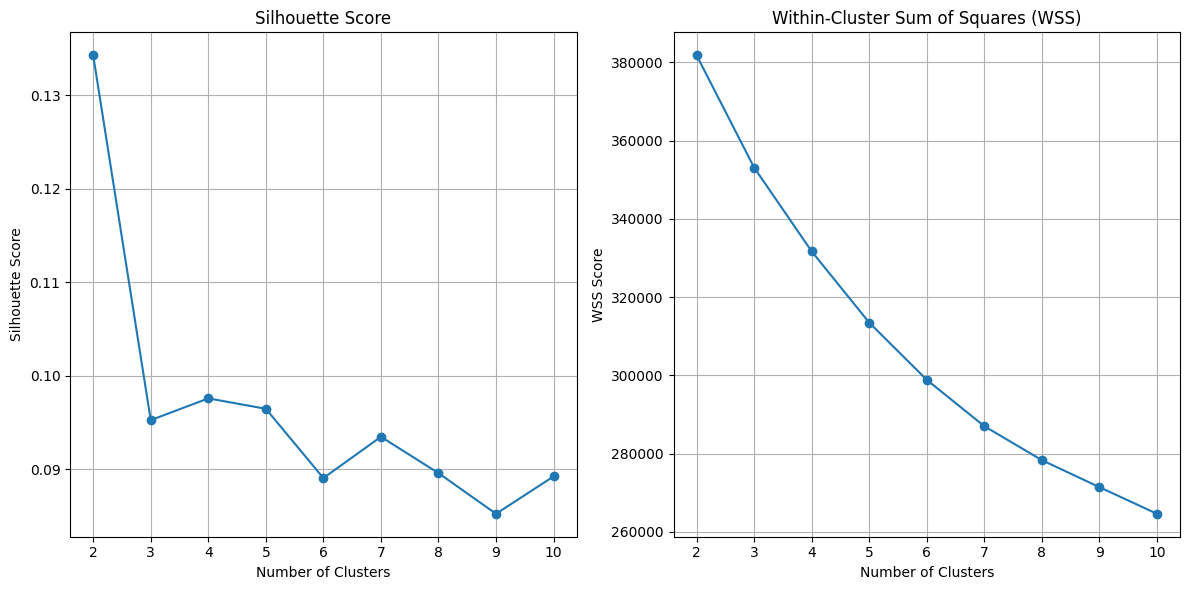

Optimal number of clusters based on Silhouette score: 2
Optimal number of clusters based on WSS score: 10


In [30]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
# Range of clusters to evaluate
min_clusters = 2
max_clusters = 10
range_n_clusters = range(min_clusters, max_clusters + 1)

# Initialize lists to store scores
silhouette_scores = []
wss_scores = []

# Calculate scores for each number of clusters
for n_clusters in tqdm(range_n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calculate Silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate WSS (inertia)
    wss_score = kmeans.inertia_
    wss_scores.append(wss_score)

# Plotting Silhouette score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)

# Plotting WSS score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, wss_scores, marker='o')
plt.title('Within-Cluster Sum of Squares (WSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.xticks(range_n_clusters)
plt.grid(True)

plt.tight_layout()
plt.show()

# Determine optimal number of clusters based on the plots
optimal_k_silhouette = range_n_clusters[np.argmax(silhouette_scores)]
optimal_k_wss = range_n_clusters[np.argmin(wss_scores)]

print(f"Optimal number of clusters based on Silhouette score: {optimal_k_silhouette}")
print(f"Optimal number of clusters based on WSS score: {optimal_k_wss}")

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

# Perform PCA to reduce dimensionality to 10 components (example)
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Alternatively, perform t-SNE directly on scaled data for visualization
tsne = TSNE(n_components=2, random_state=42, n_iter=500)
X_tsne = tsne.fit_transform(X_scaled)


# Initialize K-means with the optimal number of clusters (determined from earlier analysis)
optimal_k = 5  # Adjust this based on your analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
data['cluster'] = cluster_labels

# Function to randomly select two songs from each cluster
def select_random_songs(data, cluster_column):
    selected_songs = []
    for cluster_id in data[cluster_column].unique():
        cluster_data = data[data[cluster_column] == cluster_id]
        random_samples = cluster_data.sample(n=2)  # Randomly select 2 songs from the cluster
        selected_songs.extend(random_samples['track_name'].tolist())
    return selected_songs

# Get randomly selected songs from each cluster
random_songs = select_random_songs(data, 'cluster')

# Display selected songs
for i in range(0, len(random_songs), 2):
    print(f"Cluster {i//2 + 1}:")
    print(f"Song 1: {random_songs[i]}")
    print(f"Song 2: {random_songs[i + 1]}")
    print()

# Measure similarity (cosine similarity) between selected pairs (optional)
def measure_similarity(song1, song2):
    index_song1 = data[data['track_name'] == song1].index[0]
    index_song2 = data[data['track_name'] == song2].index[0]

    features_song1 = X_scaled[index_song1]
    features_song2 = X_scaled[index_song2]

    similarity = cosine_similarity([features_song1], [features_song2])[0][0]
    return similarity

# Example: Measure similarity between the first selected pair
song1 = random_songs[0]
song2 = random_songs[1]
similarity = measure_similarity(song1, song2)
print(f"Similarity between '{song1}' and '{song2}': {similarity:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
Song 1: Too Close
Song 2: Brown Eyed Girl

Cluster 2:
Song 1: Outlaws & Outsiders
Song 2: Whatever You Like

Cluster 3:
Song 1: Schreibe mein Schicksal
Song 2: Mandona - Acústico

Cluster 4:
Song 1: So Get Up - Pelari Remix
Song 2: Slave (Turn Up The Music) - Max Farenthide RMX

Cluster 5:
Song 1: Rest Easy
Song 2: Forever

Similarity between 'Too Close' and 'Brown Eyed Girl': 0.3569


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


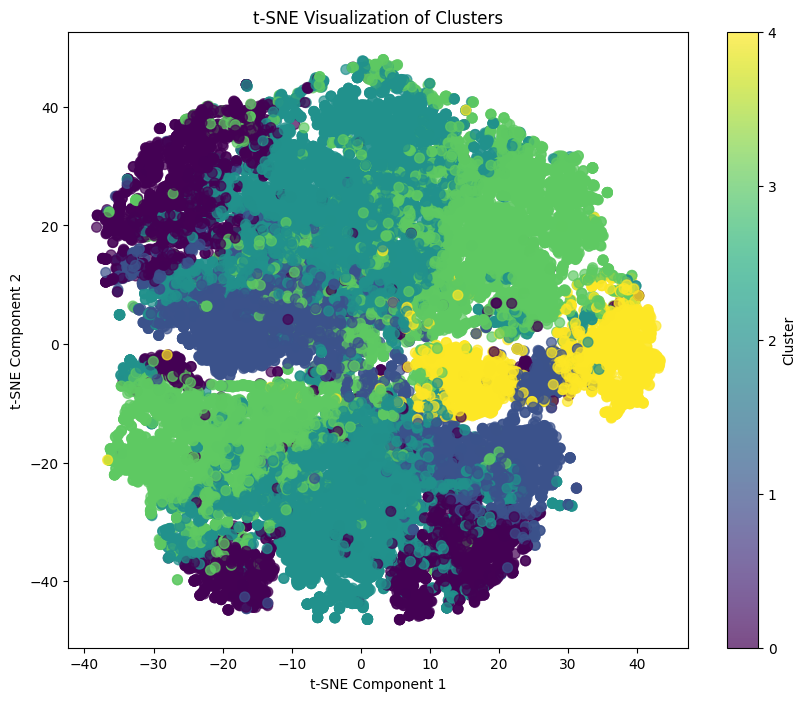

In [35]:
# Perform t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=42, n_iter=500)
X_tsne = tsne.fit_transform(X_scaled)

# Initialize K-means with the optimal number of clusters (determined from earlier analysis)
optimal_k = 5  # Adjust this based on your analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=range(optimal_k), label='Cluster')
plt.show()